## Data Analysis of Video Game Sales

#### Rank - Ranking of overall sales

#### Name - The games name

#### Platform - Platform of the games release (i.e. PC,PS4, etc.)

#### Year - Year of the game's release

#### Genre - Genre of the game

#### Publisher - Publisher of the game

#### NA_Sales - Sales in North America (in millions)

#### EU_Sales - Sales in Europe (in millions)

#### JP_Sales - Sales in Japan (in millions)

#### Other_Sales - Sales in the rest of the world (in millions)

#### Global_Sales - Total worldwide sales.

In [2]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.head().describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,5.0,3.000,1.581139,1.00,2.00,3.00,4.00,5.00
Year,5.0,2000.800,10.232302,1985.00,1996.00,2006.00,2008.00,2009.00
NA_Sales,5.0,22.688,12.446261,11.27,15.75,15.85,29.08,41.49
EU_Sales,5.0,13.076,9.568366,3.58,8.89,11.01,12.88,29.02
JP_Sales,5.0,5.574,2.950107,3.28,3.77,3.79,6.81,10.22
Other_Sales,5.0,3.300,3.099685,0.77,1.00,2.96,3.31,8.46
Global_Sales,5.0,44.634,21.565857,31.37,33.00,35.82,40.24,82.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.shape

(16598, 11)

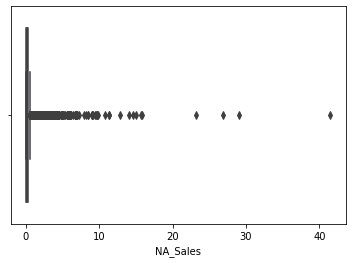

In [7]:
sns.boxplot(x= df["NA_Sales"]);

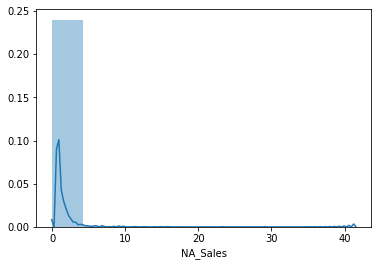

In [8]:
sns.distplot(df.NA_Sales, bins= 10, kde= True);

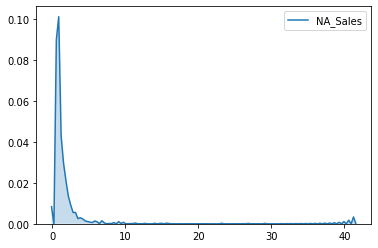

In [9]:
sns.kdeplot(df.NA_Sales, shade= True);

In [10]:
df["NA_Sales"].head(10).sort_index(ascending=True)

0    41.49
1    29.08
2    15.85
3    15.75
4    11.27
5    23.20
6    11.38
7    14.03
8    14.59
9    26.93
Name: NA_Sales, dtype: float64

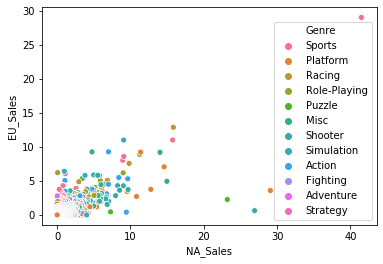

In [11]:
sns.scatterplot(x= "NA_Sales", y= "EU_Sales",hue= "Genre", data= df);

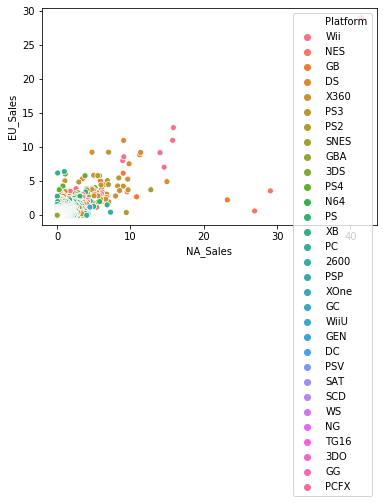

In [12]:
sns.scatterplot(x= "NA_Sales", y= "EU_Sales",hue= "Platform", data= df);

In [13]:
df["Publisher"].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
New World Computing                1
Kando Games                        1
Lighthouse Interactive             1
Plenty                             1
Paradox Development                1
Name: Publisher, Length: 578, dtype: int64

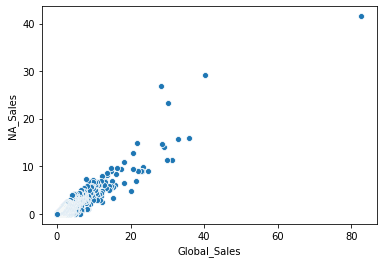

In [14]:
sns.scatterplot(x= "Global_Sales", y= "NA_Sales", data= df);

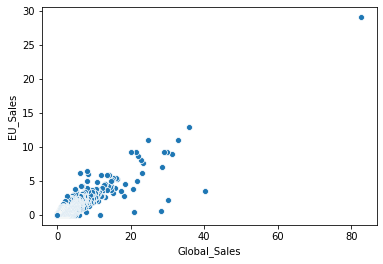

In [15]:
sns.scatterplot(x= "Global_Sales", y= "EU_Sales", data= df);

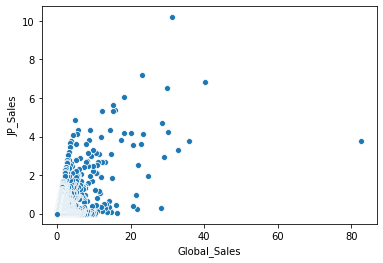

In [16]:
sns.scatterplot(x= "Global_Sales", y= "JP_Sales", data= df);

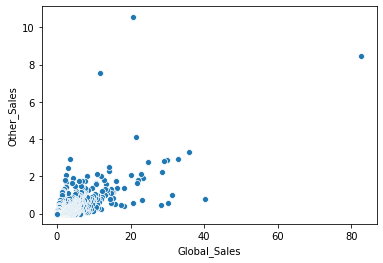

In [19]:
sns.scatterplot(x= "Global_Sales", y= "Other_Sales", data= df);

##### >>> TAHMİN: Global_Sales = 100 --> NA_Sales = 50, EU_Sales = 25, JP_Sales= 10, Other_Sales = 15

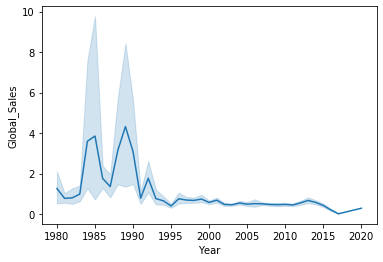

In [20]:
sns.lineplot(x= "Year", y= "Global_Sales", markers= True, dashes= False, data= df);

###### >>> Mavi çizgi --> ortalama değere karşılık geliyor.
###### >>> Etraftaki Mavi Alan --> Güven aralığı, standart sapma.

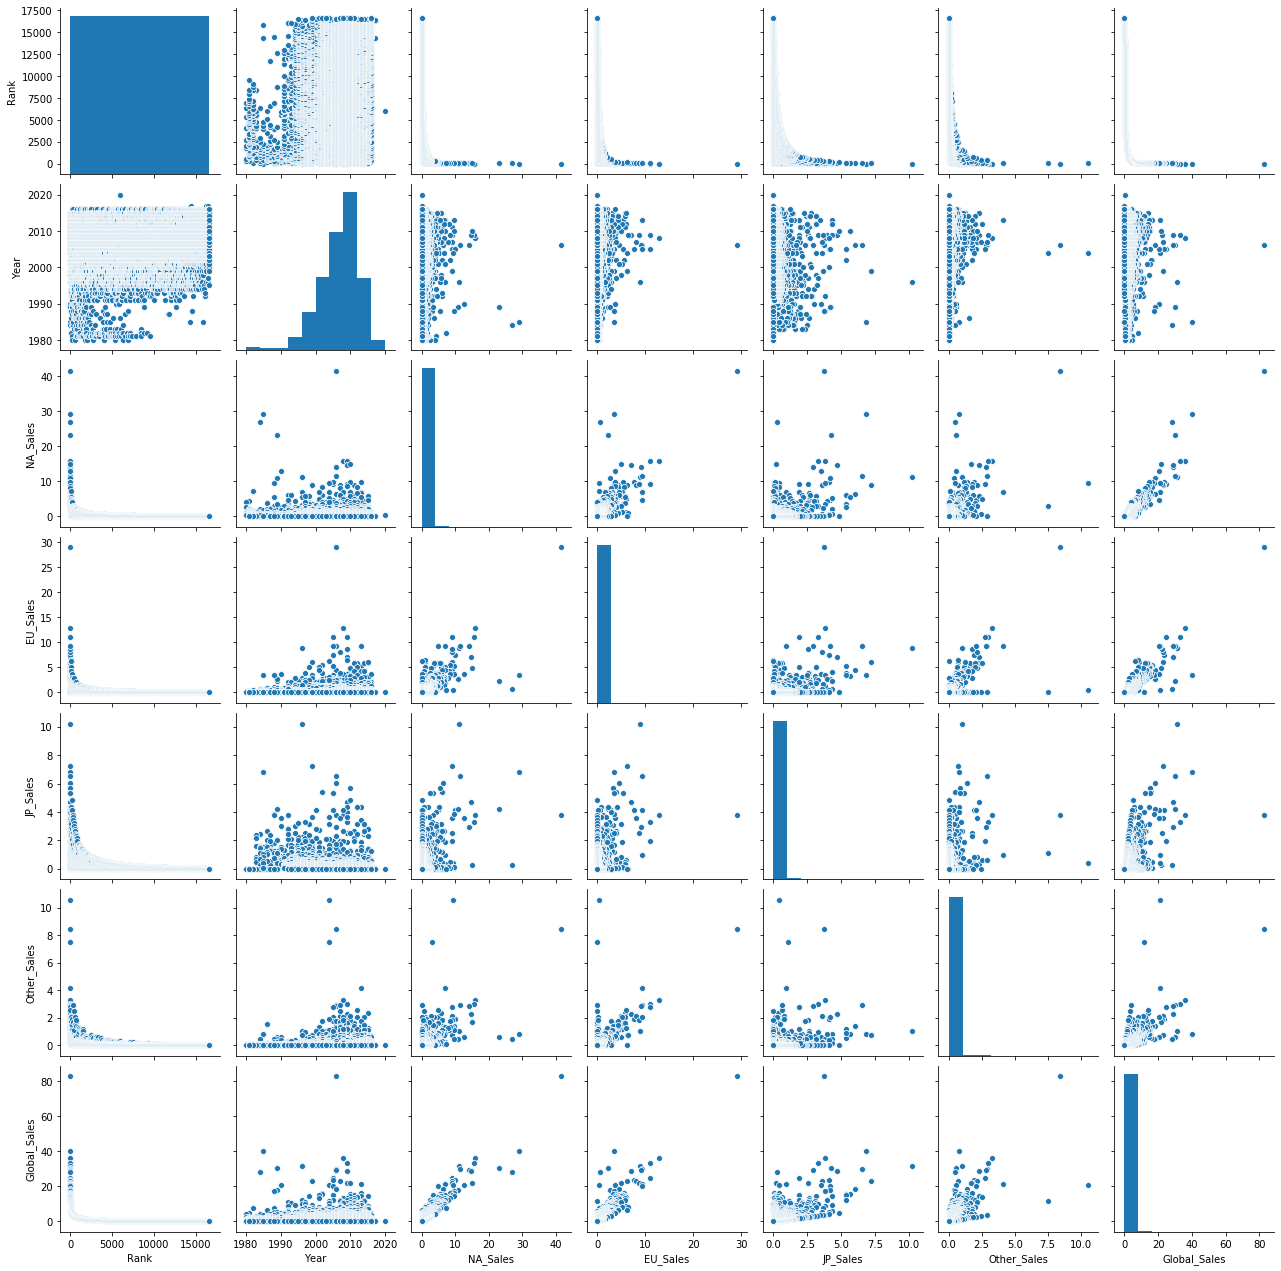

In [21]:
sns.pairplot(df);

In [23]:
df.groupby(["Platform", "Genre"])["Global_Sales"].mean()

Platform  Genre       
2600      Action          0.480984
          Adventure       0.850000
          Fighting        0.620000
          Misc            0.716000
          Platform        1.474444
                            ...   
XOne      Role-Playing    0.729231
          Shooter         1.563939
          Simulation      0.180000
          Sports          0.665833
          Strategy        0.126667
Name: Global_Sales, Length: 293, dtype: float64

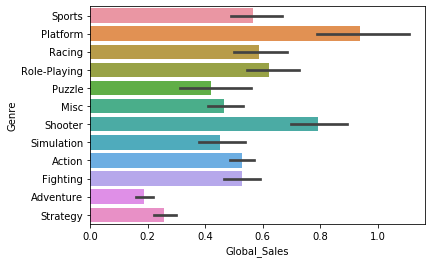

In [24]:
sns.barplot(x= "Global_Sales", y= "Genre", data= df);

##### >>> Siyah çubuklar standart sapmayı belirtir.

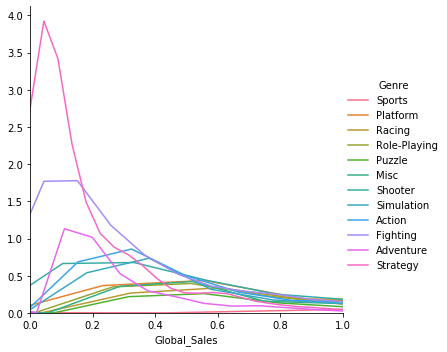

In [25]:
(sns
 .FacetGrid(df,
             hue= "Genre", 
             height= 5,
             xlim = (0, 1))
.map(sns.kdeplot, "Global_Sales", shade= False)
.add_legend()
);

In [26]:
df["Global_Sales"].T

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

In [27]:
df["Global_Sales"].mean()

0.53744065550074

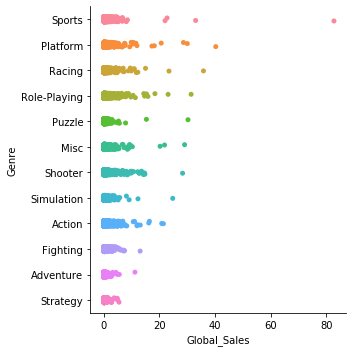

In [28]:
sns.catplot(x= "Global_Sales", y= "Genre", data= df);  

##### Publisher:
###### Electronic Arts %8
###### Activision %6
###### Other(14272) %86

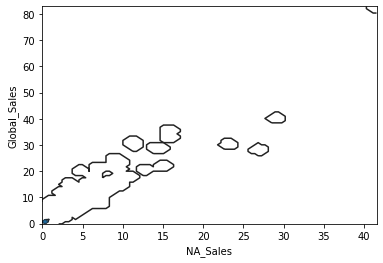

In [29]:
sns.kdeplot(df.NA_Sales, df.Global_Sales);

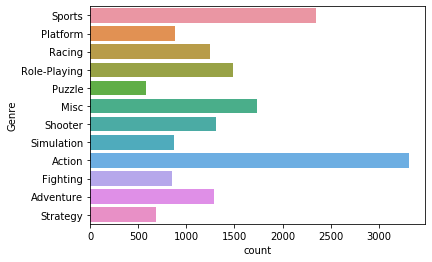

In [30]:
sns.countplot(y='Genre', data=df);

##### >>> En çok "Action" türünde oyun yapılırken en çok reva gören oyun "Sports" türünden olmuştur.

In [31]:
df["Name"].head(50)

0                                       Wii Sports
1                                Super Mario Bros.
2                                   Mario Kart Wii
3                                Wii Sports Resort
4                         Pokemon Red/Pokemon Blue
5                                           Tetris
6                            New Super Mario Bros.
7                                         Wii Play
8                        New Super Mario Bros. Wii
9                                        Duck Hunt
10                                      Nintendogs
11                                   Mario Kart DS
12                     Pokemon Gold/Pokemon Silver
13                                         Wii Fit
14                                    Wii Fit Plus
15                              Kinect Adventures!
16                              Grand Theft Auto V
17                   Grand Theft Auto: San Andreas
18                               Super Mario World
19    Brain Age: Train Your Bra

In [32]:
df["Name"].value_counts().head(10)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
FIFA 14                                     9
Ratatouille                                 9
LEGO Jurassic World                         8
Monopoly                                    8
LEGO The Hobbit                             8
LEGO Star Wars II: The Original Trilogy     8
Terraria                                    8
Name: Name, dtype: int64

In [33]:
df.loc[df['Global_Sales'].idxmax()]

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

#### >>> Global olarak en çok satılan oyun "Wii Sports" hakkında bilgiler.

In [34]:
df.loc[df['Global_Sales'].idxmin()]

Rank                 15983
Name                 Turok
Platform                PC
Year                  2008
Genre               Action
Publisher       Touchstone
NA_Sales                 0
EU_Sales              0.01
JP_Sales                 0
Other_Sales              0
Global_Sales          0.01
Name: 15980, dtype: object

#### >>> Global olarak en çok satılan oyun "Turok" hakkında bilgiler.

In [35]:
df.groupby("Genre")["Global_Sales"].mean()

Genre
Action          0.528100
Adventure       0.185879
Fighting        0.529375
Misc            0.465762
Platform        0.938341
Puzzle          0.420876
Racing          0.586101
Role-Playing    0.623233
Shooter         0.791885
Simulation      0.452364
Sports          0.567319
Strategy        0.257151
Name: Global_Sales, dtype: float64

In [36]:
df.groupby("Platform")["Global_Sales"].mean()

Platform
2600    0.729925
3DO     0.033333
3DS     0.486169
DC      0.307115
DS      0.380254
GB      2.606633
GBA     0.387470
GC      0.358561
GEN     1.050370
GG      0.040000
N64     0.686144
NES     2.561939
NG      0.120000
PC      0.269604
PCFX    0.030000
PS      0.610920
PS2     0.581046
PS3     0.720722
PS4     0.827679
PSP     0.244254
PSV     0.149952
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.699404
WiiU    0.572448
X360    0.774672
XB      0.313422
XOne    0.662254
Name: Global_Sales, dtype: float64

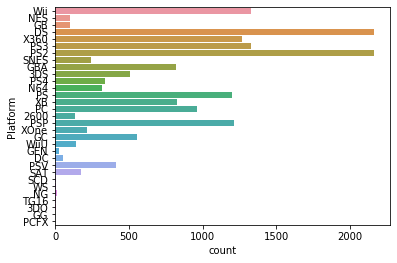

In [37]:
sns.countplot(y='Platform', data=df);

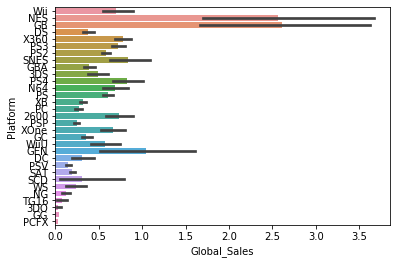

In [38]:
sns.barplot(x= "Global_Sales", y= "Platform", data= df);

In [39]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64